In [1]:
%load_ext pymatbridge

Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-52b47f73-8006-44b5-b22f-199f59aa4014
Send 'exit' command to kill the server
..MATLAB started and connected!


/home/saket/anaconda/lib/python2.7/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


## Part (a)

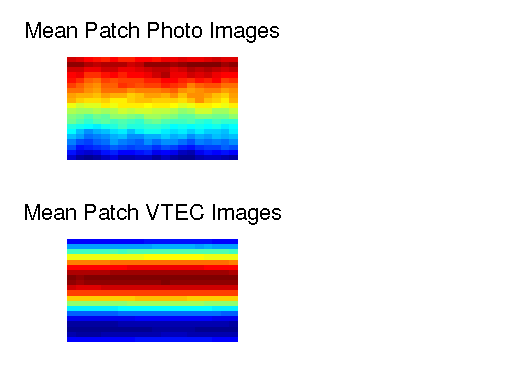

In [2]:
close all;
clear all;
load('PCA_Exercise_Images.mat')
vectorized_images = [];
images = {};
images{1} = Photo_Images;
images{2} = VTEC_Images;
imgindex = 1;
R= [1,10,80];
img = images{imgindex}; 
img_title = 'pca-part-c-VTEC_Images';
index = 170;

if (imgindex ==1)
    img_title = 'pca-part-c-Photo_Images';
    index = 70;
end
disp(img_title);
[nrow, ncol, nimg] = size(img);
original = double(img(:,:,index));

for j=1:numel(R)
    r= R(j);
    for i=1:nrow/20
        for j=1:ncol/20
            patch = original(20*(i-1)+1:20*(i), 20*(j-1)+1:20*j);
            vimg = double(vectorize_image(patch));
            vectorized_images = [vectorized_images; vimg];
        end
    end
    mean_patch = mean(vectorized_images);
    [eigvals, eigvecs, projected, reconstructed] = perform_pca(vectorized_images, r);

    imagesc(original);
    print(sprintf('%s-original', img_title), '-dpng');
    close all;

    rec_patches_all = [];
    rec_patches_temp = [];

    for i=1:(nrow*ncol)/400
        rec_patch = reshape(reconstructed(i, :),20,20);
        rec_patches_temp = [rec_patches_temp  rec_patch];
        if (mod(i,ncol/20)==0)
            %rest
            rec_patches_all= [rec_patches_all;rec_patches_temp];
            rec_patches_temp = [];

        end
    end

    %imagesc(reshape(reconstructed,600,600));
    imagesc(rec_patches_all);
    print(sprintf('%s-reconstructed-r=%d',img_title, r), '-dpng');
    close all;


    all_patch_minus_mean = bsxfun(@minus, vectorized_images, mean_patch);
    all_patch_minus_mean = all_patch_minus_mean.^2;
    euc_distance = sum(sqrt(sum(all_patch_minus_mean,2)))/(size(vectorized_images,1));
    total_variance = sum(eigvals);

    new_distance = bsxfun(@minus, reconstructed, mean_patch);
    new_distance = new_distance.^2;
    new_euc_distance = sum(sqrt(sum(new_distance,2)))/(size(vectorized_images,1));
    captured_variance = sum(eigvals(1:r));

    variance_ratio = captured_variance/total_variance;
    disp(sprintf('r=%f \t Captured Variance: %f',r, variance_ratio));
end


## Part (b)

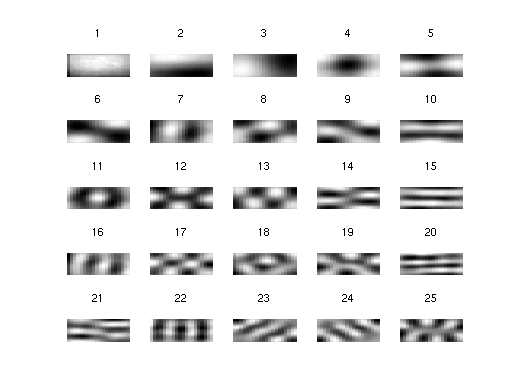

In [10]:
%%matlab
load('PCA_Exercise_Images.mat')
vectorized_images = [];
[nrow, ncol, nimg] = size(Photo_Images);
for i=1:nimg
    vimg = vectorize_image(Photo_Images(:,:,i));
    vectorized_images = [vectorized_images; vimg];
end
vectorized_images = double(vectorized_images);
[eigvals, eigvecs, projected, reconstructed] = perform_pca(vectorized_images, 25);
figure('position', [0, 0, 5000, 5000]) 
for i=1:25
    eigimage = reshape(eigvecs(:,i),20,20);
    g=subplot(5,5,i);
    colormap(gray);
    imagesc(eigimage);
    axis off;
    title(i, 'FontSize', 6);

end



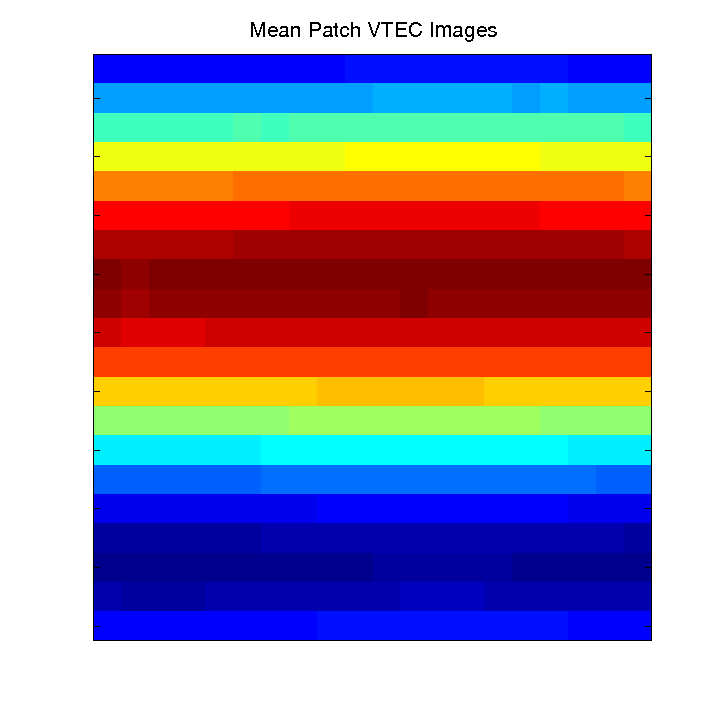

'Est'

In [12]:
from IPython.display import Image
from IPython.display import display
display(Image(filename="Mean-Patch-VTEC-Images.png"), 'Est')